# AUTHOR: OLAOLUWA JOHNSON TAIWO.
    Intern code: OGTIPDA0S223

# PROBLEM STATEMENT


The project aims to enhance loan approval processes by leveraging Exploratory Data Analysis (EDA) on a comprehensive dataset. Through detailed analysis, it seeks to identify key factors that strongly influence loan approval or default. The objective is to understand the drivers behind loan defaults, empowering the company to optimize risk assessment and portfolio management strategies. By conducting univariate and multivariate analyses, exploring correlations, and identifying patterns within the data, the project aims to uncover critical variables that impact loan approval decisions. Additionally, this analysis intends to reveal insights into financial, employment, and educational aspects that significantly contribute to loan approvals or rejections. Ultimately, this investigation seeks to provide actionable insights for mitigating risks, optimizing loan approval processes, and ensuring sound lending practices while minimizing defaults.

# DATA ANALYSIS PROCESS

Data Collection: Gathered a comprehensive dataset containing various attributes related to loan applicants.

Preprocessed the dataset by handling missing values, outliers, and formatting issues to ensure data integrity.

Conducted individual analysis on variables, visualizing distributions, and identifying patterns that might indicate loan defaults.

Explored relationships between pairs of variables to understand potential correlations and influences on loan approval or rejection.

Investigated interactions between multiple variables to uncover complex patterns and key drivers of loan approval.

Created new features or derived variables to gain deeper insights or improve model performance.

Examined correlations between different variables and the target (loan approval status) to identify significant factors.

Analyzed trends or patterns over time, such as registration trends, to understand temporal aspects related to loan approvals.

Explored techniques like FacetGrids or statistical methods to manage memory constraints when visualizing multiple variables.
Identified key drivers of loan approval through statistical analysis and domain knowledge, offering insights and recommendations to optimize risk assessment and lending practices.


# FINDINGS

Payment Status: A significant portion (8.4%) of clients experienced payment difficulties, necessitating attention to risk assessment and repayment strategies.

Household Composition: Predominantly, households consist of 1 or 2 children, indicating a potential impact of family size on financial commitments.

Gender Dynamics: Females exhibit a slightly higher tendency to miss payments compared to males, warranting further investigation into gender-specific factors influencing repayment reliability.

Age Distribution: The concentration of clients within the 30-60 age range highlights this demographic as a critical target for tailored loan policies and risk mitigation strategies.

Credit Bureau Activity: Most clients had a single credit bureau inquiry, implying limited credit activity or potentially stable financial behaviors.

Occupational Influence: Laborers, sales staff, and managers demonstrate a heightened risk of payment delinquency, emphasizing the necessity for tailored lending products or financial support.

Education's Impact: Clients with secondary school education are more prone to missed payments, hinting at the correlation between educational attainment and financial reliability.

Marital Status Dynamics: Married clients display a higher likelihood of payment difficulties, urging the exploration of marital dynamics impacting financial obligations.

Contract Preferences: Cash and consumer loans are preferred, indicating potential financial constraints among clients availing these loan types.

Income Type and Age-Family Structure Impact: Laborers, particularly within the 30-49 age range and those without children, face challenges in meeting payment deadlines, demanding targeted interventions and risk assessment methodologies.

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import sklearn
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
sklearn.__version__

'1.2.2'

In [2]:
app1 = pd.read_csv("C:\\Users\\TOJMARK LTD\OESON PROJECT\\previous_application.csv")
app2 = pd.read_csv("C:\\Users\\TOJMARK LTD\\OESON PROJECT\\application_data.csv")

In [3]:
app2.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


# DATA EXPLORATION

# Merging Of the Previous Data and Application Data

In [4]:
app1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [5]:
app2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [6]:
app1.shape

(1670214, 37)

In [7]:
app2.shape

(307511, 122)

In [8]:
#To merge the dataset
merged_data = pd.merge(app1, app2, on='SK_ID_CURR', how='inner')

In [9]:
merged_data.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE_x,AMT_ANNUITY_x,AMT_APPLICATION,AMT_CREDIT_x,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE_x,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START_x,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,1696966,271877,Consumer loans,68258.655,1800000.0,1754721.0,180000.0,1800000.0,SATURDAY,18,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,2154916,271877,Consumer loans,12417.390,108400.5,119848.5,0.0,108400.5,SUNDAY,14,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,1536272,108129,Cash loans,21709.125,450000.0,512370.0,NaN,450000.0,WEDNESDAY,9,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
merged_data.shape

(1413701, 158)

In [11]:
new_data = merged_data

# HANDLING MISSING VALUES

In [12]:
new_data.isnull().sum()

SK_ID_PREV                         0
SK_ID_CURR                         0
NAME_CONTRACT_TYPE_x               0
AMT_ANNUITY_x                 307218
AMT_APPLICATION                    0
                               ...  
AMT_REQ_CREDIT_BUREAU_DAY     163627
AMT_REQ_CREDIT_BUREAU_WEEK    163627
AMT_REQ_CREDIT_BUREAU_MON     163627
AMT_REQ_CREDIT_BUREAU_QRT     163627
AMT_REQ_CREDIT_BUREAU_YEAR    163627
Length: 158, dtype: int64

In [13]:
new_data.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE_x,AMT_ANNUITY_x,AMT_APPLICATION,AMT_CREDIT_x,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE_x,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START_x,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,1696966,271877,Consumer loans,68258.655,1800000.0,1754721.0,180000.0,1800000.0,SATURDAY,18,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,2154916,271877,Consumer loans,12417.390,108400.5,119848.5,0.0,108400.5,SUNDAY,14,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,1536272,108129,Cash loans,21709.125,450000.0,512370.0,NaN,450000.0,WEDNESDAY,9,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
#Handling missing value for AMT_ANNUITY by filling missing values with mean
mean_annuity = new_data['AMT_ANNUITY_x'].mean()
mean_annuity1 = new_data['AMT_ANNUITY_x'].mode()
mean_annuity2 = new_data['AMT_ANNUITY_x'].median()
print("Mean", mean_annuity)
print("Mode",mean_annuity1)
print("Median",mean_annuity2)

Mean 15837.184952001073
Mode 0    2250.0
Name: AMT_ANNUITY_x, dtype: float64
Median 11223.765


In [15]:
new_data['AMT_ANNUITY_x'].fillna(mean_annuity2, inplace=True)

In [16]:
new_data.isnull().sum()

SK_ID_PREV                         0
SK_ID_CURR                         0
NAME_CONTRACT_TYPE_x               0
AMT_ANNUITY_x                      0
AMT_APPLICATION                    0
                               ...  
AMT_REQ_CREDIT_BUREAU_DAY     163627
AMT_REQ_CREDIT_BUREAU_WEEK    163627
AMT_REQ_CREDIT_BUREAU_MON     163627
AMT_REQ_CREDIT_BUREAU_QRT     163627
AMT_REQ_CREDIT_BUREAU_YEAR    163627
Length: 158, dtype: int64

In [17]:
# Remove missing values from 'AMT_REQ_CREDIT_BUREAU_DAY'
new_data = new_data.dropna(subset=['AMT_REQ_CREDIT_BUREAU_DAY'])

In [18]:
new_data.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE_x,AMT_ANNUITY_x,AMT_APPLICATION,AMT_CREDIT_x,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE_x,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START_x,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,1696966,271877,Consumer loans,68258.655,1800000.0,1754721.0,180000.0,1800000.0,SATURDAY,18,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,2154916,271877,Consumer loans,12417.390,108400.5,119848.5,0.0,108400.5,SUNDAY,14,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
36,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,0,0,0,0,0.0,0.0,0.0,1.0,2.0,8.0
37,1247679,202054,Cash loans,11223.765,0.0,0.0,NaN,NaN,MONDAY,11,...,0,0,0,0,0.0,0.0,0.0,1.0,2.0,8.0


In [19]:
# Remove missing values from 'AMT_REQ_CREDIT_BUREAU_WEEK'
new_data = new_data.dropna(subset=['AMT_REQ_CREDIT_BUREAU_WEEK'])

# Remove missing values from 'AMT_REQ_CREDIT_BUREAU_MON'
new_data = new_data.dropna(subset=['AMT_REQ_CREDIT_BUREAU_MON'])

# Remove missing values from 'AMT_REQ_CREDIT_BUREAU_QRT'
new_data = new_data.dropna(subset=['AMT_REQ_CREDIT_BUREAU_QRT'])

# Remove missing values from 'AMT_REQ_CREDIT_BUREAU_YEAR'
new_data = new_data.dropna(subset=['AMT_REQ_CREDIT_BUREAU_YEAR'])

In [20]:
new_data.isnull().sum()

SK_ID_PREV                    0
SK_ID_CURR                    0
NAME_CONTRACT_TYPE_x          0
AMT_ANNUITY_x                 0
AMT_APPLICATION               0
                             ..
AMT_REQ_CREDIT_BUREAU_DAY     0
AMT_REQ_CREDIT_BUREAU_WEEK    0
AMT_REQ_CREDIT_BUREAU_MON     0
AMT_REQ_CREDIT_BUREAU_QRT     0
AMT_REQ_CREDIT_BUREAU_YEAR    0
Length: 158, dtype: int64

In [21]:
new_data.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE_x,AMT_ANNUITY_x,AMT_APPLICATION,AMT_CREDIT_x,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE_x,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START_x,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,1696966,271877,Consumer loans,68258.655,1800000.0,1754721.0,180000.0,1800000.0,SATURDAY,18,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,2154916,271877,Consumer loans,12417.390,108400.5,119848.5,0.0,108400.5,SUNDAY,14,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
36,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,0,0,0,0,0.0,0.0,0.0,1.0,2.0,8.0
37,1247679,202054,Cash loans,11223.765,0.0,0.0,NaN,NaN,MONDAY,11,...,0,0,0,0,0.0,0.0,0.0,1.0,2.0,8.0


#    # Performning fengineering process

In [22]:
#getting age from the birth days
new_data['AGE'] = round(-new_data['DAYS_BIRTH'] / 365, 2)

In [23]:
#getting income ratio from the amt_credit
new_data['CREDIT_INCOME_RATIO'] = new_data['AMT_CREDIT_x'] / new_data['AMT_INCOME_TOTAL']

In [24]:
#getting the emplyoment age ratio
new_data['EMPLOYMENT_TO_AGE_RATIO'] = -new_data['DAYS_EMPLOYED'] / new_data['DAYS_BIRTH']

# EXPLORATORY DATA ANALYSIS

# UNIVARIATE ANALYSIS 

In [25]:
new_data.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE_x,AMT_ANNUITY_x,AMT_APPLICATION,AMT_CREDIT_x,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE_x,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START_x,...,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE,CREDIT_INCOME_RATIO,EMPLOYMENT_TO_AGE_RATIO
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,0,0.0,0.0,0.0,0.0,0.0,0.0,39.57,0.07620,-0.511805
1,1696966,271877,Consumer loans,68258.655,1800000.0,1754721.0,180000.0,1800000.0,SATURDAY,18,...,0,0.0,0.0,0.0,0.0,0.0,0.0,39.57,7.79876,-0.511805
2,2154916,271877,Consumer loans,12417.390,108400.5,119848.5,0.0,108400.5,SUNDAY,14,...,0,0.0,0.0,0.0,0.0,0.0,0.0,39.57,0.53266,-0.511805
36,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,0,0.0,0.0,0.0,1.0,2.0,8.0,27.45,2.24475,-0.250200
37,1247679,202054,Cash loans,11223.765,0.0,0.0,NaN,NaN,MONDAY,11,...,0,0.0,0.0,0.0,1.0,2.0,8.0,27.45,0.00000,-0.250200


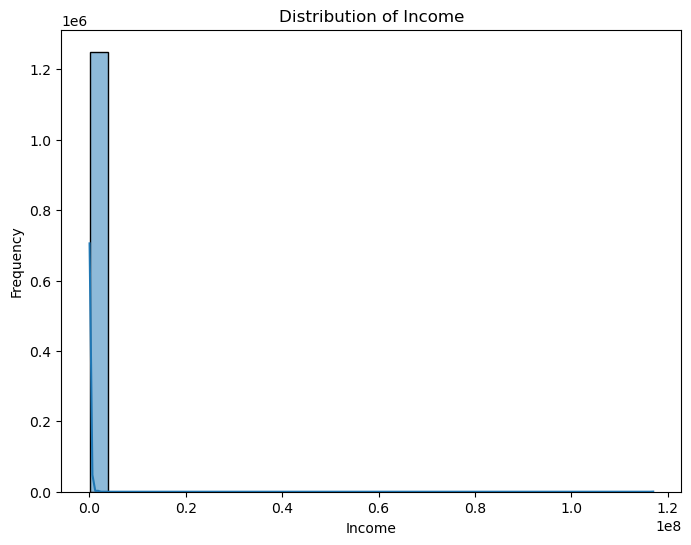

In [26]:
# Plotting distribution of 'AMT_INCOME_TOTAL'
plt.figure(figsize=(8, 6))
sns.histplot(new_data['AMT_INCOME_TOTAL'], bins=30, kde=True)
plt.title('Distribution of Income')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()

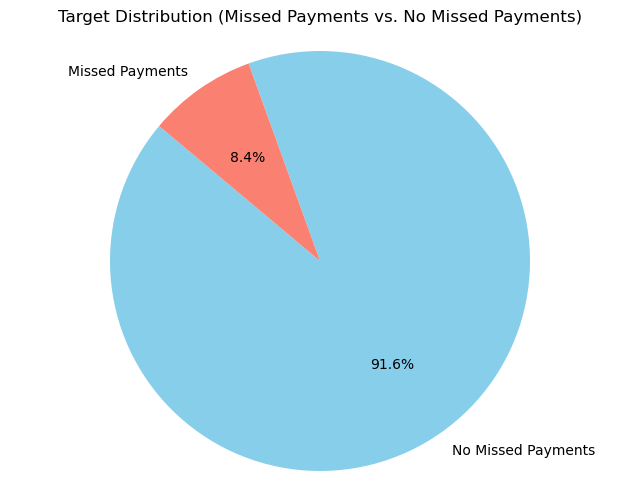

In [27]:
# Target Distribution Pie Chart
target_counts = new_data['TARGET'].value_counts()
labels_target = ['No Missed Payments', 'Missed Payments']
sizes_target = target_counts.values.tolist()

plt.figure(figsize=(8, 6))
plt.pie(sizes_target, labels=labels_target, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'salmon'])
plt.title('Target Distribution (Missed Payments vs. No Missed Payments)')
plt.axis('equal')
plt.show()

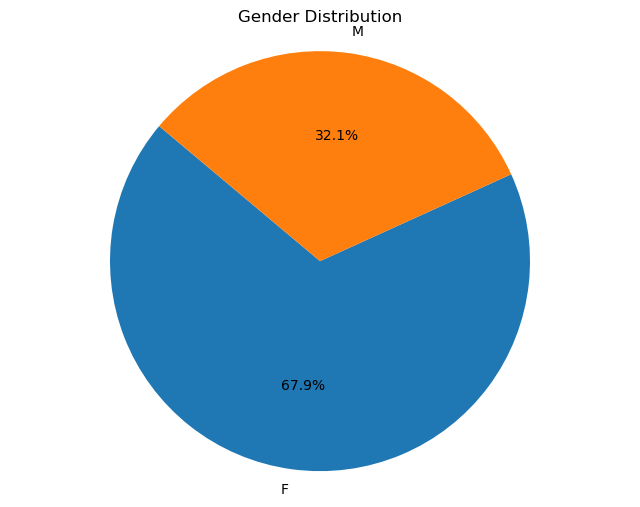

In [28]:
# Gender Distribution Pie Chart
# let frist remove any potential columns
filtered_data = new_data[new_data['CODE_GENDER'] != 'XNA']
gender_counts = filtered_data['CODE_GENDER'].value_counts()
labels_gender = gender_counts.index.tolist()
sizes_gender = gender_counts.values.tolist()

plt.figure(figsize=(8, 6))
plt.pie(sizes_gender, labels=labels_gender, autopct='%1.1f%%', startangle=140)
plt.title('Gender Distribution')
plt.axis('equal')
plt.show()

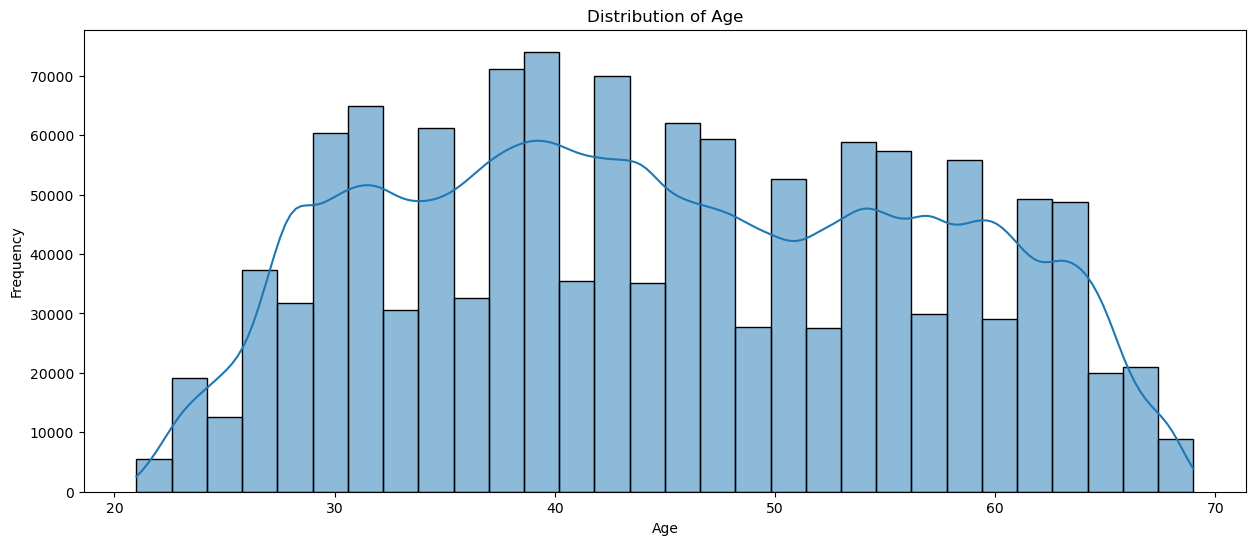

In [29]:
# Plotting distribution of 'DAYS_BIRTH'
# first converting DAYS_BIRTH to age in years
new_data['AGE'] = round(-new_data['DAYS_BIRTH'] / 365.25, 0)

plt.figure(figsize=(15, 6))
sns.histplot(new_data['AGE'], bins=30, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

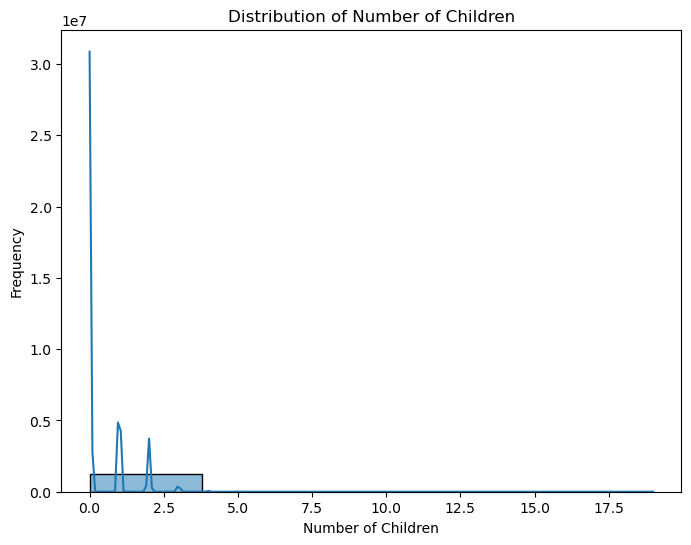

In [30]:
# Plotting distribution of 'CNT_CHILDREN'
plt.figure(figsize=(8, 6))
sns.histplot(new_data['CNT_CHILDREN'], bins=5, kde=True)
plt.title('Distribution of Number of Children')
plt.xlabel('Number of Children')
plt.ylabel('Frequency')
plt.show()

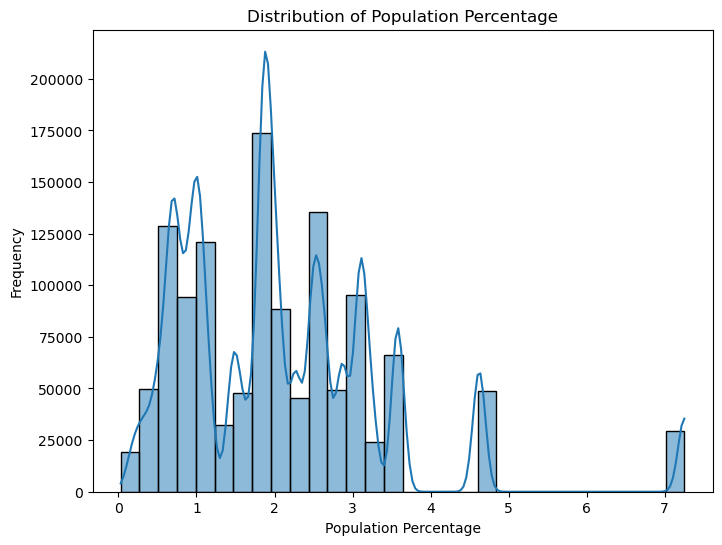

In [31]:
# Plotting distribution of 'REGION_POPULATION_RELATIVE'
# Convert REGION_POPULATION_RELATIVE to percentage
new_data['REGION_POPULATION_PERCENTAGE'] = new_data['REGION_POPULATION_RELATIVE'] * 100

# Plotting distribution of 'REGION_POPULATION_PERCENTAGE'
plt.figure(figsize=(8, 6))
sns.histplot(new_data['REGION_POPULATION_PERCENTAGE'], bins=30, kde=True)
plt.title('Distribution of Population Percentage')
plt.xlabel('Population Percentage')
plt.ylabel('Frequency')
plt.show()

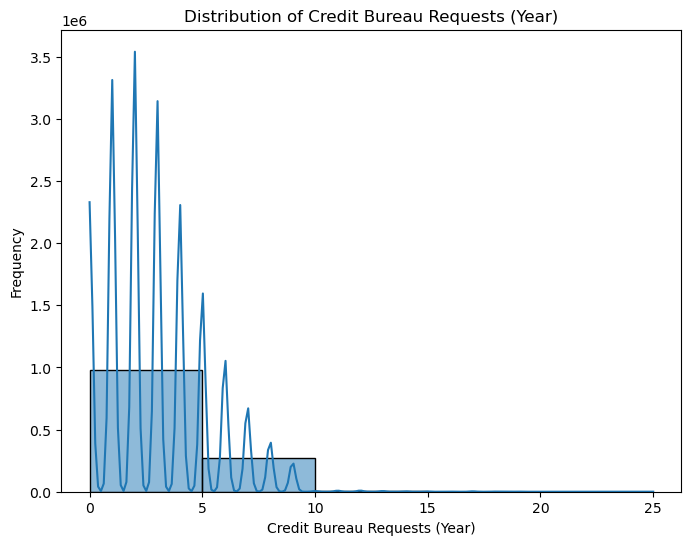

In [32]:
# Plotting distribution of 'AMT_REQ_CREDIT_BUREAU_YEAR'
plt.figure(figsize=(8, 6))
sns.histplot(new_data['AMT_REQ_CREDIT_BUREAU_YEAR'], bins=5, kde=True)
plt.title('Distribution of Credit Bureau Requests (Year)')
plt.xlabel('Credit Bureau Requests (Year)')
plt.ylabel('Frequency')
plt.show()

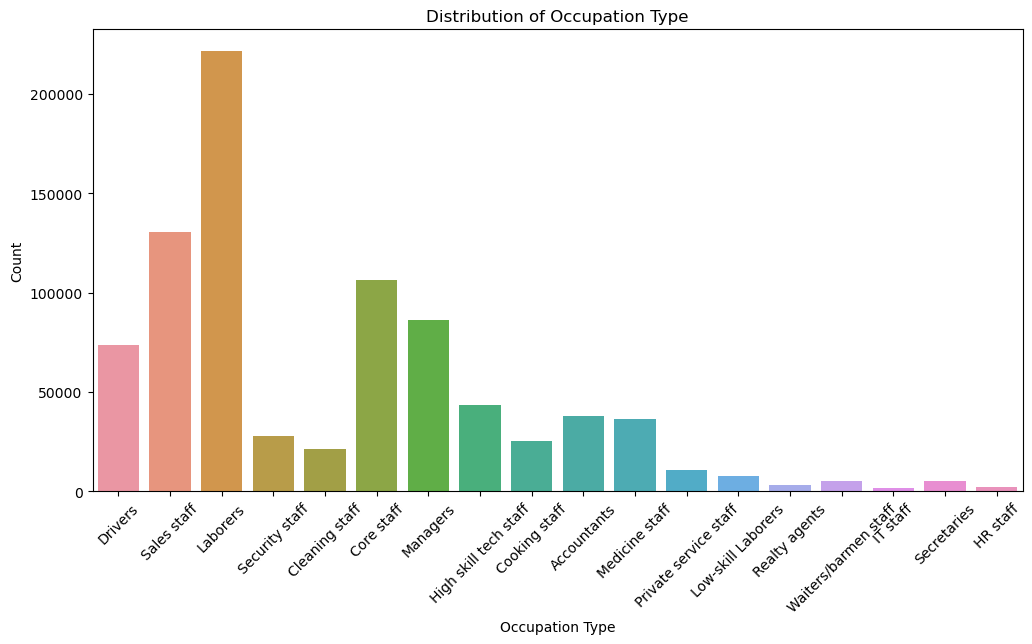

In [33]:
# Plotting distribution of 'OCCUPATION_TYPE'
plt.figure(figsize=(12, 6))
sns.countplot(data=new_data, x='OCCUPATION_TYPE')
plt.title('Distribution of Occupation Type')
plt.xlabel('Occupation Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

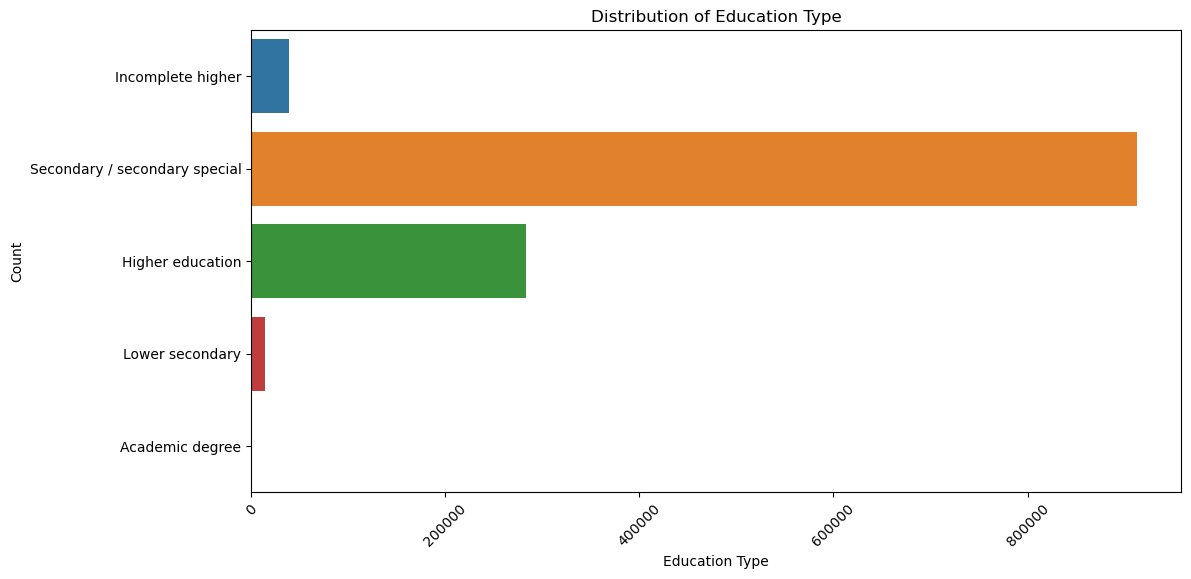

In [34]:
# Plotting distribution of 'NAME_EDUCATION_TYPE'
plt.figure(figsize=(12, 6))
sns.countplot(data=new_data, y='NAME_EDUCATION_TYPE')
plt.title('Distribution of Education Type')
plt.xlabel('Education Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

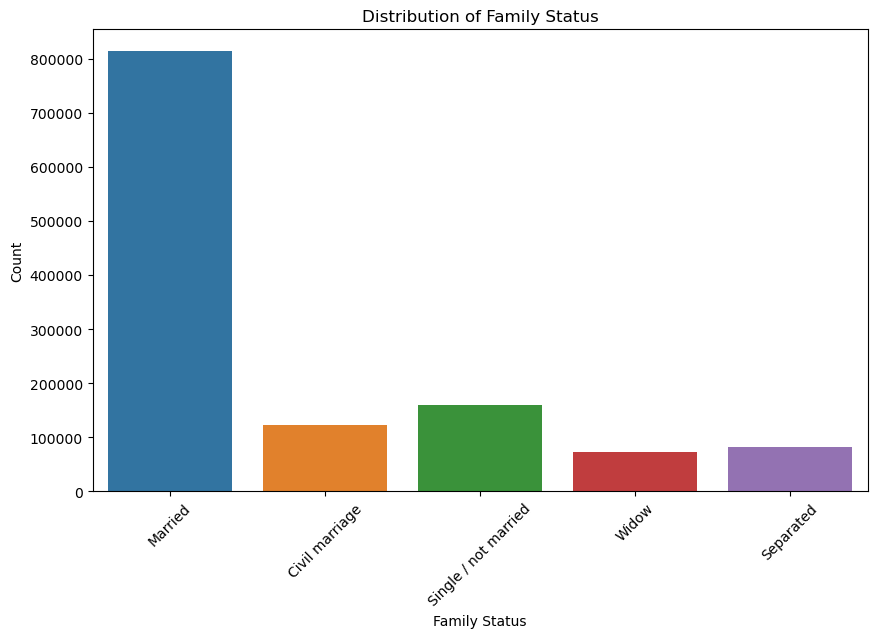

In [35]:
# Plotting distribution of 'NAME_FAMILY_STATUS'
plt.figure(figsize=(10, 6))
sns.countplot(data=new_data, x='NAME_FAMILY_STATUS')
plt.title('Distribution of Family Status')
plt.xlabel('Family Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

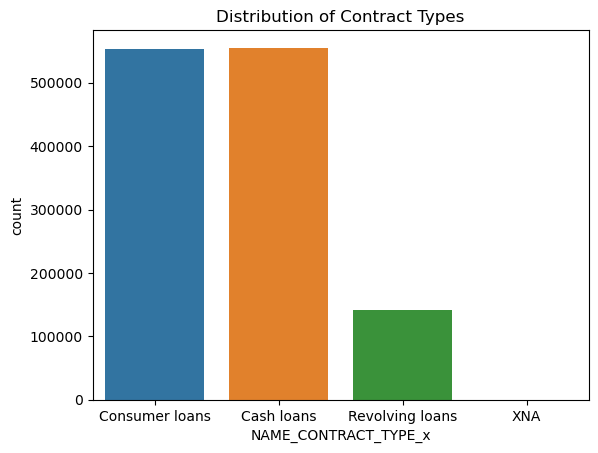

In [36]:
sns.countplot(data=new_data, x='NAME_CONTRACT_TYPE_x')
plt.title('Distribution of Contract Types')
plt.show()

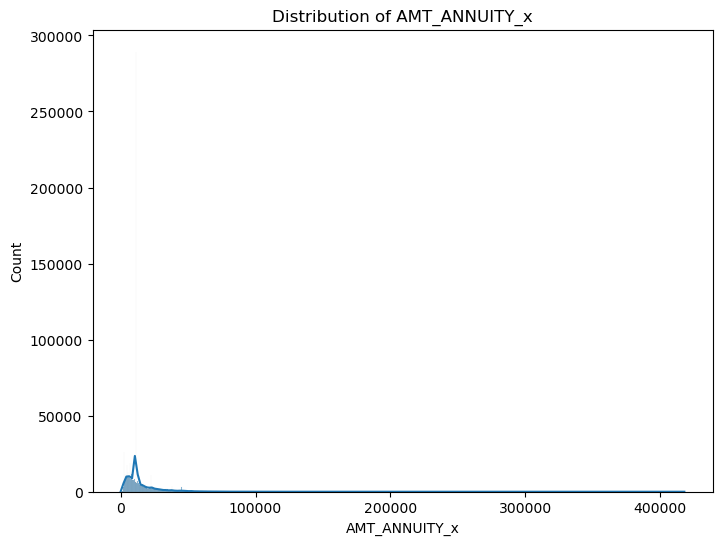

In [37]:
plt.figure(figsize=(8, 6))
sns.histplot(new_data['AMT_ANNUITY_x'], kde=True)
plt.title('Distribution of AMT_ANNUITY_x')
plt.xlabel('AMT_ANNUITY_x')
plt.show()

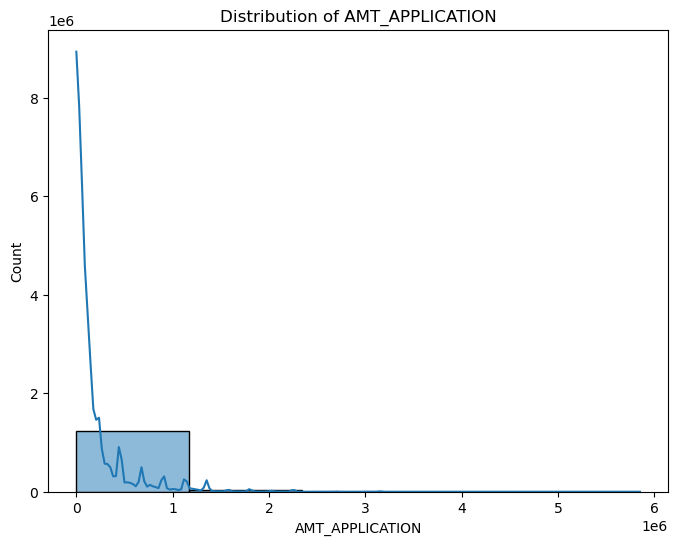

In [38]:
plt.figure(figsize=(8, 6))
sns.histplot(new_data['AMT_APPLICATION'],bins=5, kde=True)
plt.title('Distribution of AMT_APPLICATION')
plt.xlabel('AMT_APPLICATION')
plt.show()

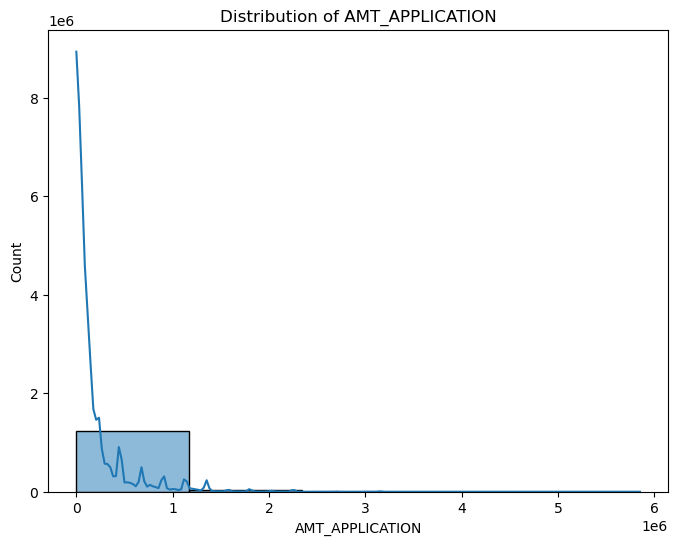

In [39]:
plt.figure(figsize=(8, 6))
sns.histplot(new_data['AMT_APPLICATION'], bins=5, kde=True)
plt.title('Distribution of AMT_APPLICATION')
plt.xlabel('AMT_APPLICATION')
plt.show()

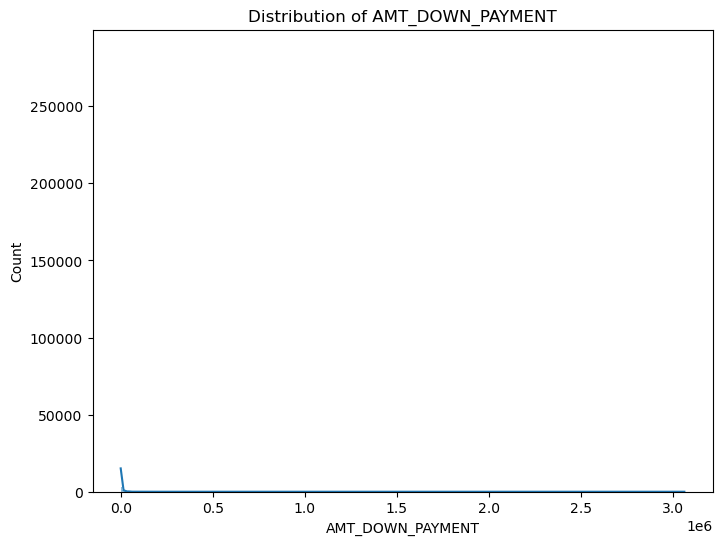

In [40]:
plt.figure(figsize=(8, 6))
sns.histplot(new_data['AMT_DOWN_PAYMENT'], kde=True)
plt.title('Distribution of AMT_DOWN_PAYMENT')
plt.xlabel('AMT_DOWN_PAYMENT')
plt.show()

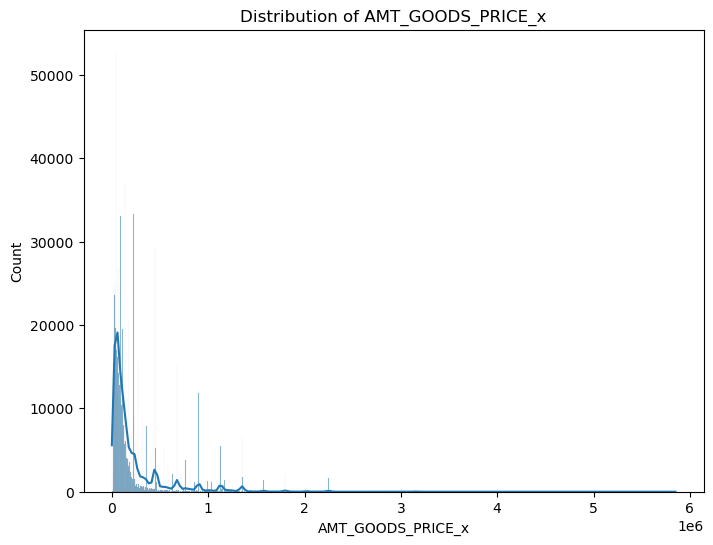

In [41]:
plt.figure(figsize=(8, 6))
sns.histplot(new_data['AMT_GOODS_PRICE_x'], kde=True)
plt.title('Distribution of AMT_GOODS_PRICE_x')
plt.xlabel('AMT_GOODS_PRICE_x')
plt.show()

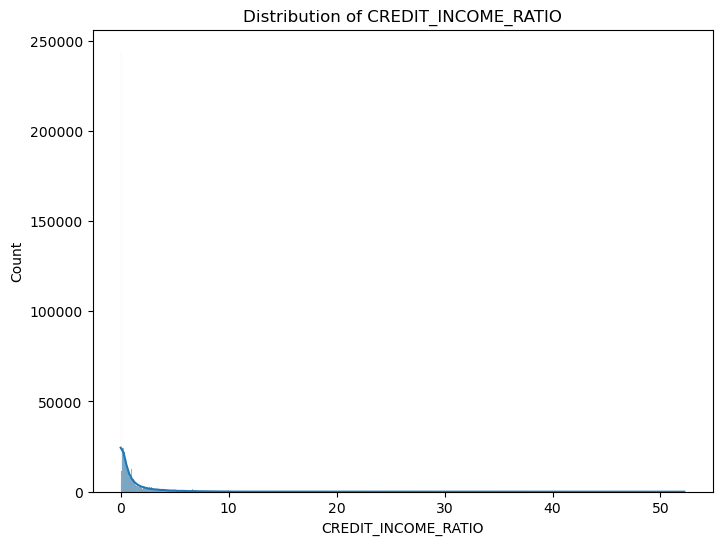

In [42]:
plt.figure(figsize=(8, 6))
sns.histplot(new_data['CREDIT_INCOME_RATIO'], kde=True)
plt.title('Distribution of CREDIT_INCOME_RATIO')
plt.xlabel('CREDIT_INCOME_RATIO')
plt.show()

In [43]:
new_data.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE_x,AMT_ANNUITY_x,AMT_APPLICATION,AMT_CREDIT_x,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE_x,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START_x,...,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE,CREDIT_INCOME_RATIO,EMPLOYMENT_TO_AGE_RATIO,REGION_POPULATION_PERCENTAGE
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,0.0,0.0,0.0,0.0,0.0,0.0,40.0,0.07620,-0.511805,4.6220
1,1696966,271877,Consumer loans,68258.655,1800000.0,1754721.0,180000.0,1800000.0,SATURDAY,18,...,0.0,0.0,0.0,0.0,0.0,0.0,40.0,7.79876,-0.511805,4.6220
2,2154916,271877,Consumer loans,12417.390,108400.5,119848.5,0.0,108400.5,SUNDAY,14,...,0.0,0.0,0.0,0.0,0.0,0.0,40.0,0.53266,-0.511805,4.6220
36,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,0.0,0.0,0.0,1.0,2.0,8.0,27.0,2.24475,-0.250200,2.8663
37,1247679,202054,Cash loans,11223.765,0.0,0.0,NaN,NaN,MONDAY,11,...,0.0,0.0,0.0,1.0,2.0,8.0,27.0,0.00000,-0.250200,2.8663


# Bivariate Analysis: Analysis of Two Variables

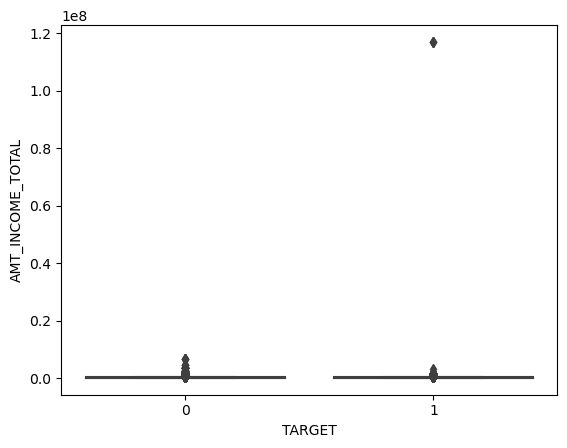

In [44]:
#boxplot of the income totall against the target
sns.boxplot(x='TARGET', y='AMT_INCOME_TOTAL', data=new_data)
plt.show()

# Plotting Variable of Those who Miss Payment most

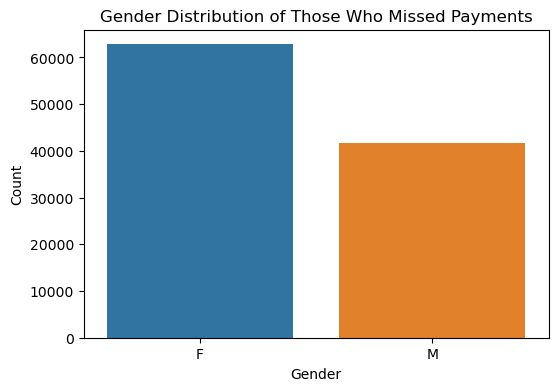

In [45]:
#Gender Whow miss payment most
# Filter data for only those who missed payments (TARGET = 1)
missed_payments = new_data[new_data['TARGET'] == 1]

# Create a count plot to visualize gender distribution among those who missed payments
plt.figure(figsize=(6, 4))
sns.countplot(x='CODE_GENDER', data=missed_payments)
plt.title('Gender Distribution of Those Who Missed Payments')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

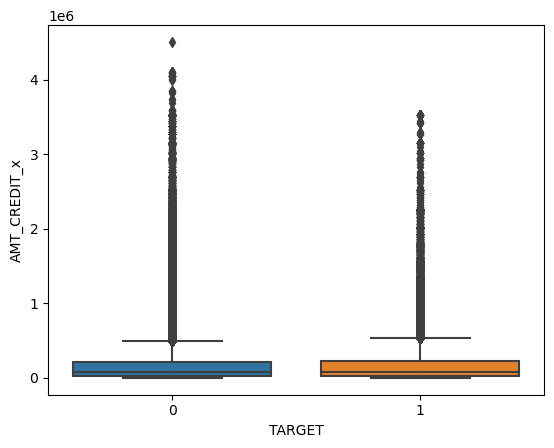

In [46]:
#the credit against the target
sns.boxplot(x='TARGET', y='AMT_CREDIT_x', data=new_data)
plt.show()

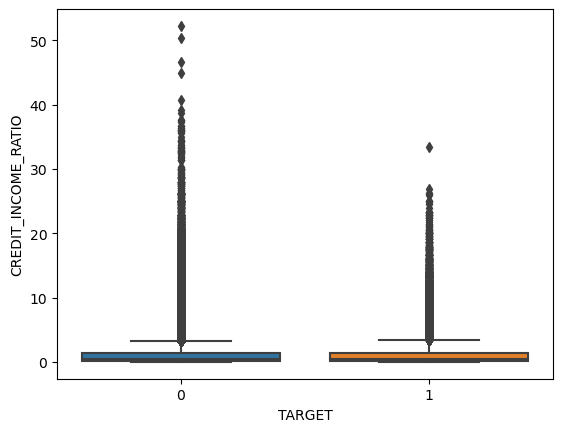

In [47]:
#income rator aginst the target
sns.boxplot(x='TARGET', y='CREDIT_INCOME_RATIO', data=new_data)
plt.show()

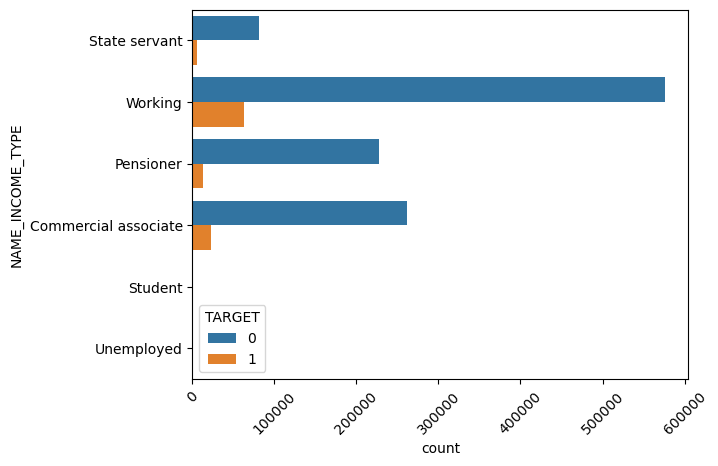

In [48]:
#income type aginst the target 
sns.countplot(y='NAME_INCOME_TYPE', hue='TARGET', data=new_data)
plt.xticks(rotation=45)
plt.show()

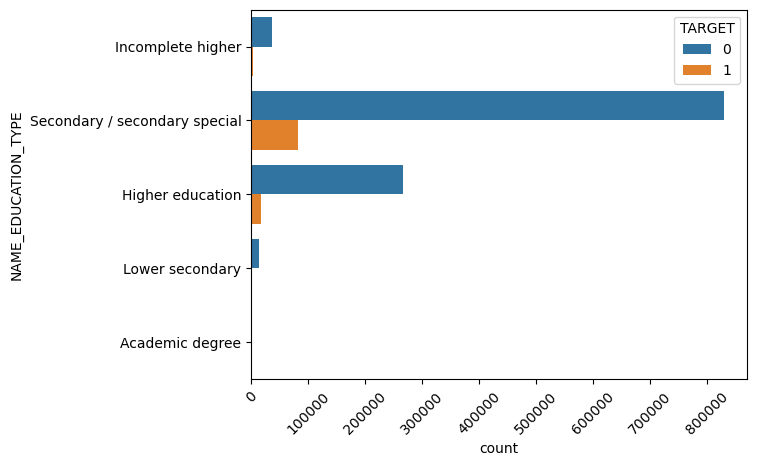

In [49]:
#education level compare to target
sns.countplot(y='NAME_EDUCATION_TYPE', hue='TARGET', data=new_data)
plt.xticks(rotation=45)
plt.show()

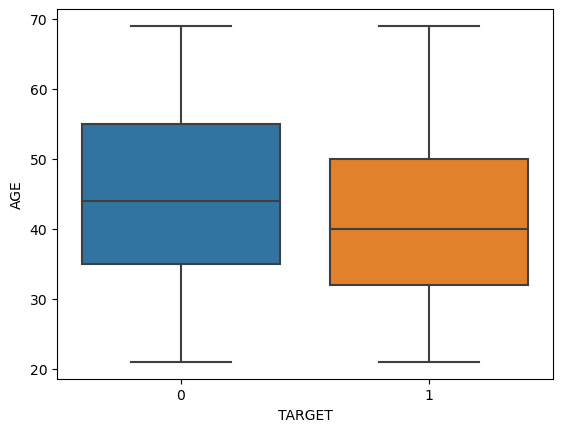

In [50]:
#age against the target
sns.boxplot(x='TARGET', y='AGE', data=new_data)
plt.show()

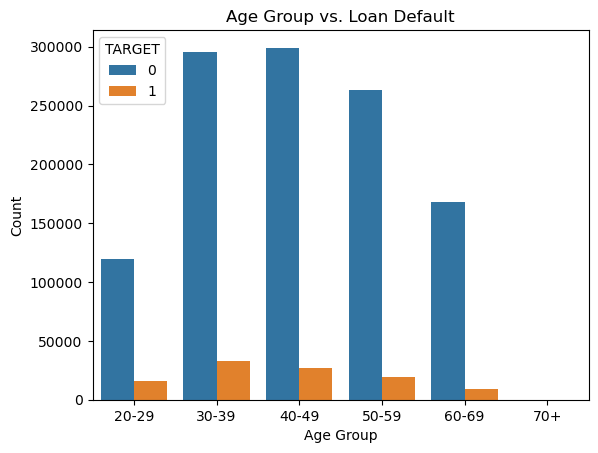

In [51]:
#creating age group and visualising age against the target
# Define age groups
bins = [20, 30, 40, 50, 60, 70, 120]
labels = ['20-29', '30-39', '40-49', '50-59', '60-69', '70+']
new_data['AGE_GROUP'] = pd.cut(new_data['AGE'], bins=bins, labels=labels, right=False)

# Visualize age groups against loan default
sns.countplot(x='AGE_GROUP', hue='TARGET', data=new_data)
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Age Group vs. Loan Default')
plt.show()

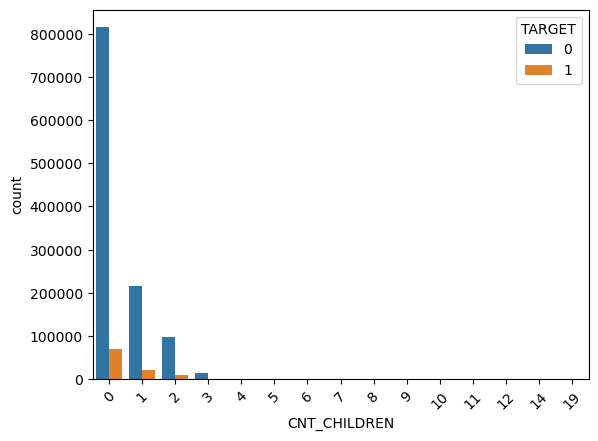

In [52]:
sns.countplot(x='CNT_CHILDREN', hue='TARGET', data=new_data)
plt.xticks(rotation=45)
plt.show()

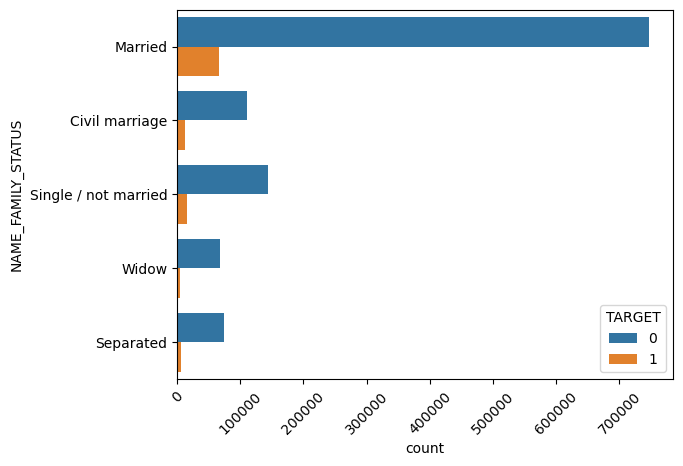

In [53]:
#getting the family status aginst the target
sns.countplot(y='NAME_FAMILY_STATUS', hue='TARGET', data=new_data)
plt.xticks(rotation=45)
plt.show()

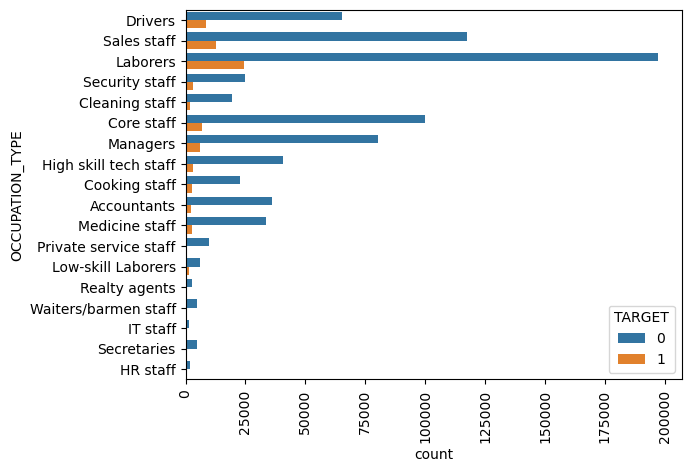

In [54]:
#getting the occupation type against the 
sns.countplot(y='OCCUPATION_TYPE', hue='TARGET', data=new_data)
plt.xticks(rotation=90)
plt.show()

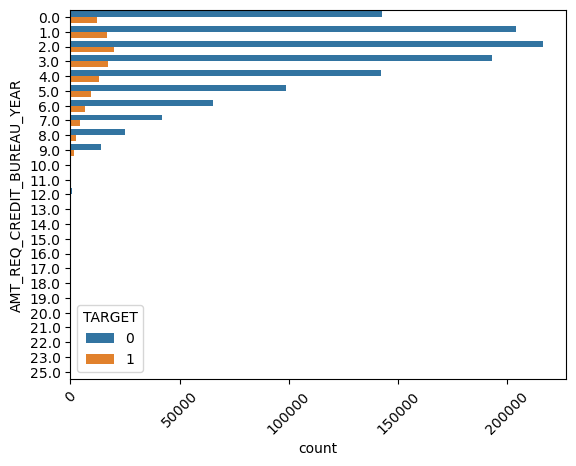

In [55]:
sns.countplot(y='AMT_REQ_CREDIT_BUREAU_YEAR', hue='TARGET', data=new_data)
plt.xticks(rotation=45)
plt.show()

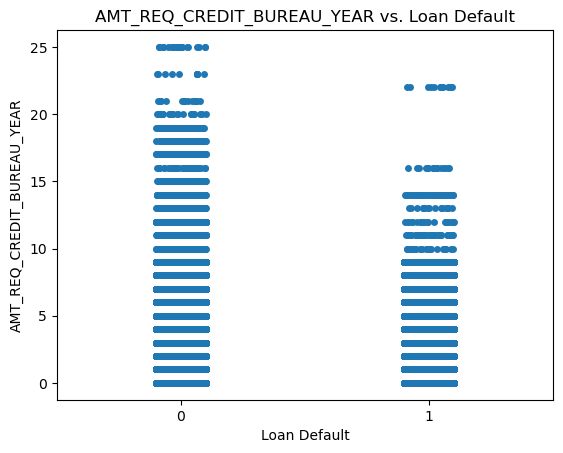

In [56]:
sns.stripplot(y='AMT_REQ_CREDIT_BUREAU_YEAR', x='TARGET', data=new_data, jitter=True)
plt.xlabel('Loan Default')
plt.ylabel('AMT_REQ_CREDIT_BUREAU_YEAR')
plt.title('AMT_REQ_CREDIT_BUREAU_YEAR vs. Loan Default')
plt.show()

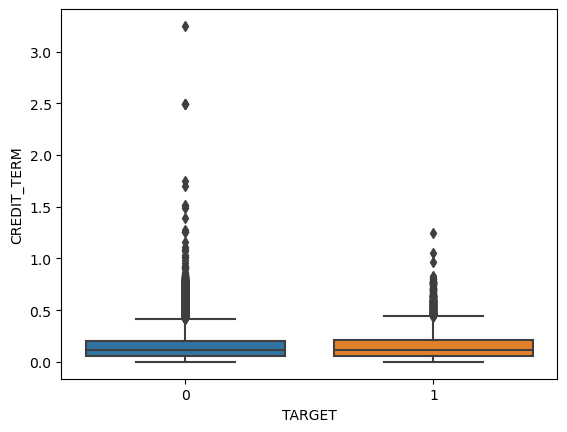

In [57]:
new_data['CREDIT_TERM'] = new_data['AMT_ANNUITY_x'] / new_data['AMT_CREDIT_x']
sns.boxplot(x='TARGET', y='CREDIT_TERM', data=new_data)
plt.show()

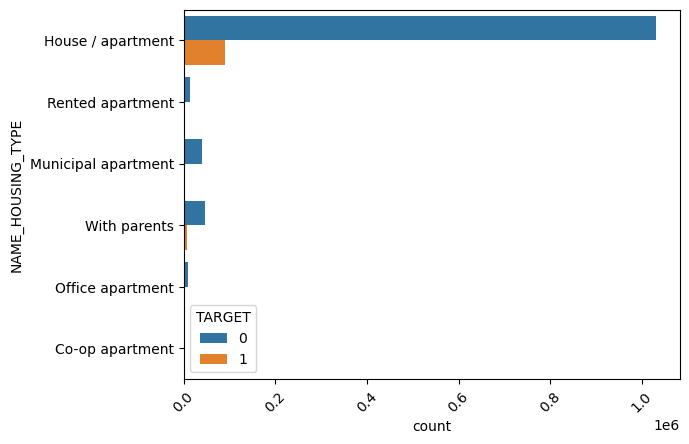

In [58]:
#getting the housing type against the target
sns.countplot(y='NAME_HOUSING_TYPE', hue='TARGET', data=new_data)
plt.xticks(rotation=45)
plt.show()

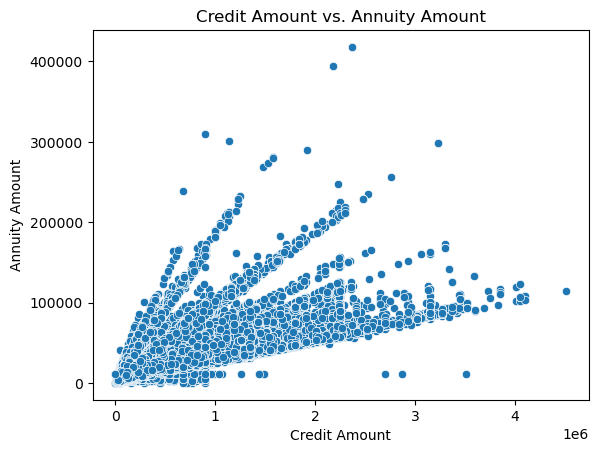

In [59]:
#checking the trend against btw credit amount and anuity
sns.scatterplot(x='AMT_CREDIT_x', y='AMT_ANNUITY_x', data=new_data)
plt.xlabel('Credit Amount')
plt.ylabel('Annuity Amount')
plt.title('Credit Amount vs. Annuity Amount')
plt.show()

In [60]:
correlation = new_data['AMT_CREDIT_x'].corr(new_data['AMT_ANNUITY_x'])
print(f"Correlation between Credit Amount and Annuity Amount: {correlation}")

Correlation between Credit Amount and Annuity Amount: 0.8150609273517835


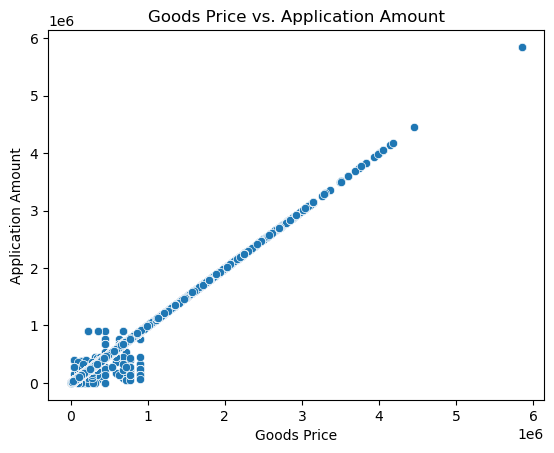

In [61]:
#checking the correlation between the good price and applciation amount
sns.scatterplot(x='AMT_GOODS_PRICE_x', y='AMT_APPLICATION', data=new_data)
plt.xlabel('Goods Price')
plt.ylabel('Application Amount')
plt.title('Goods Price vs. Application Amount')
plt.show()

In [62]:
correlation_goods_app = new_data['AMT_GOODS_PRICE_x'].corr(new_data['AMT_APPLICATION'])
print(f"Correlation between Goods Price and Application Amount: {correlation_goods_app}")

Correlation between Goods Price and Application Amount: 0.999863564681161


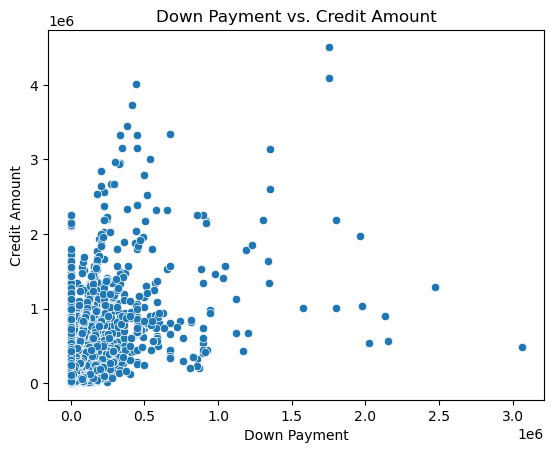

In [63]:
sns.scatterplot(x='AMT_DOWN_PAYMENT', y='AMT_CREDIT_x', data=new_data)
plt.xlabel('Down Payment')
plt.ylabel('Credit Amount')
plt.title('Down Payment vs. Credit Amount')
plt.show()

In [64]:
correlation_goods_app = new_data['AMT_DOWN_PAYMENT'].corr(new_data['AMT_CREDIT_x'])
print(f"Correlation between Goods Price and Application Amount: {correlation_goods_app}")

Correlation between Goods Price and Application Amount: 0.2940904475053817


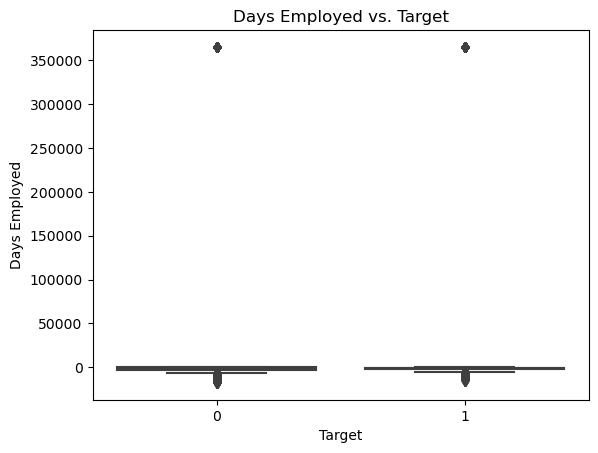

In [65]:
sns.boxplot(x='TARGET', y='DAYS_EMPLOYED', data=new_data)
plt.xlabel('Target')
plt.ylabel('Days Employed')
plt.title('Days Employed vs. Target')
plt.show()

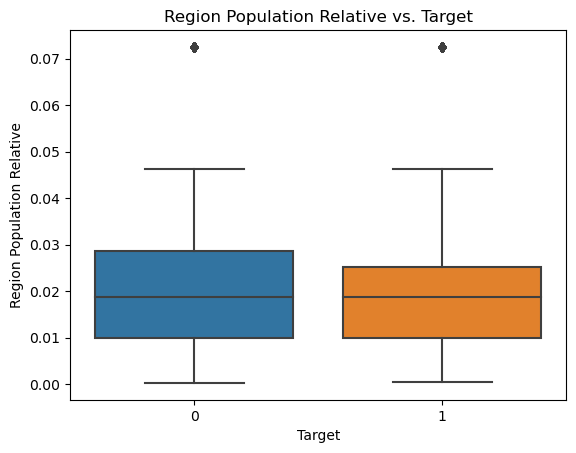

In [66]:
sns.boxplot(x='TARGET', y='REGION_POPULATION_RELATIVE', data=new_data)
plt.xlabel('Target')
plt.ylabel('Region Population Relative')
plt.title('Region Population Relative vs. Target')
plt.show()

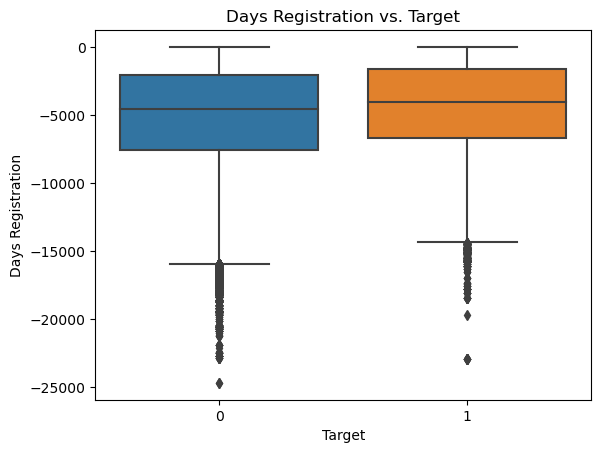

In [67]:
sns.boxplot(x='TARGET', y='DAYS_REGISTRATION', data=new_data)
plt.xlabel('Target')
plt.ylabel('Days Registration')
plt.title('Days Registration vs. Target')
plt.show()

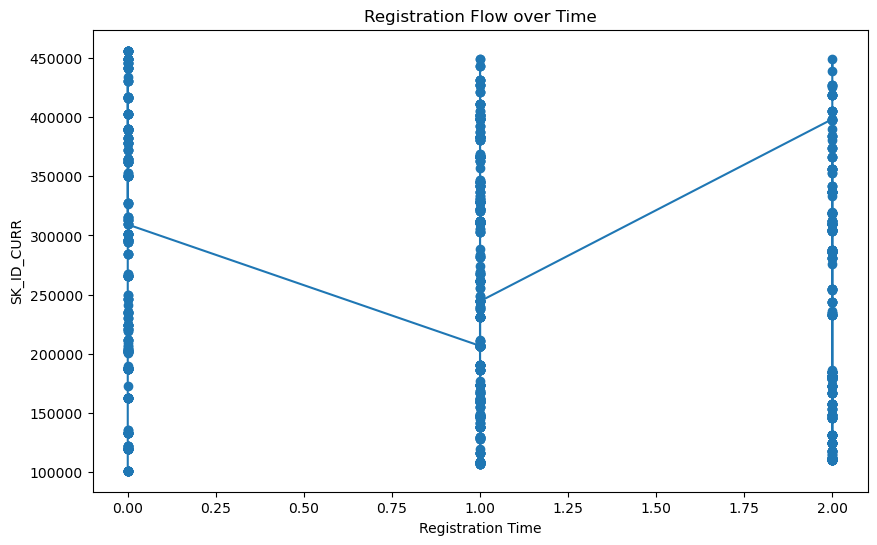

In [68]:
# Converting 'DAYS_REGISTRATION' to positive values representing time
new_data['REGISTRATION_TIME'] = -new_data['DAYS_REGISTRATION']

# Sorting by registration time
new_data_sorted = new_data.sort_values('REGISTRATION_TIME')

# Plotting registration over time for a subset of records (e.g., first 1000 records)
plt.figure(figsize=(10, 6))
plt.plot(new_data_sorted['REGISTRATION_TIME'].head(1000), new_data_sorted['SK_ID_CURR'].head(1000), marker='o')
plt.xlabel('Registration Time')
plt.ylabel('SK_ID_CURR')
plt.title('Registration Flow over Time')
plt.show()

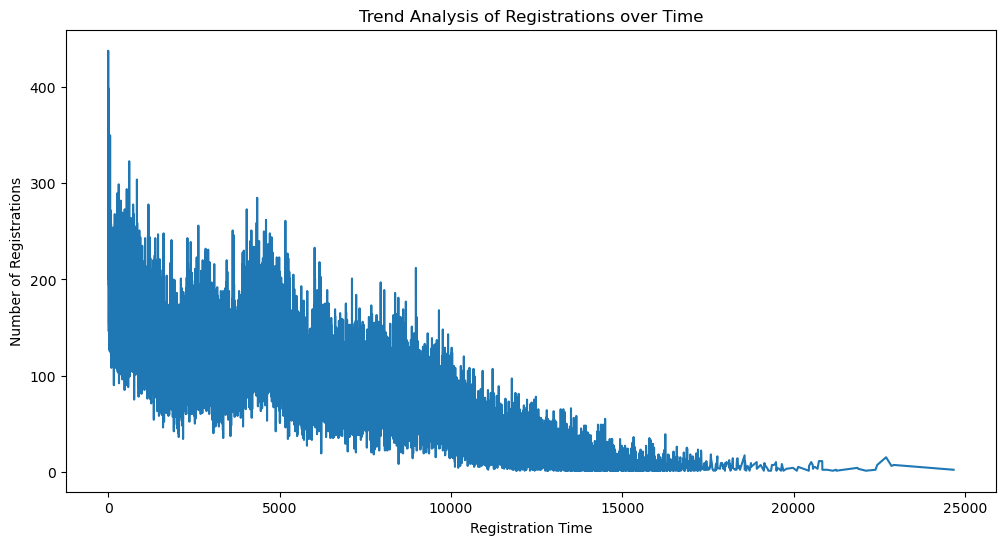

In [69]:
# Aggregate registrations by time period
registration_trend = new_data.groupby('REGISTRATION_TIME').size().reset_index(name='Registrations')

# Plotting trend analysis
plt.figure(figsize=(12, 6))
sns.lineplot(x='REGISTRATION_TIME', y='Registrations', data=registration_trend)
plt.xlabel('Registration Time')
plt.ylabel('Number of Registrations')
plt.title('Trend Analysis of Registrations over Time')
plt.show()

# Multivariate Analysis: Analysis of Multiple Variables

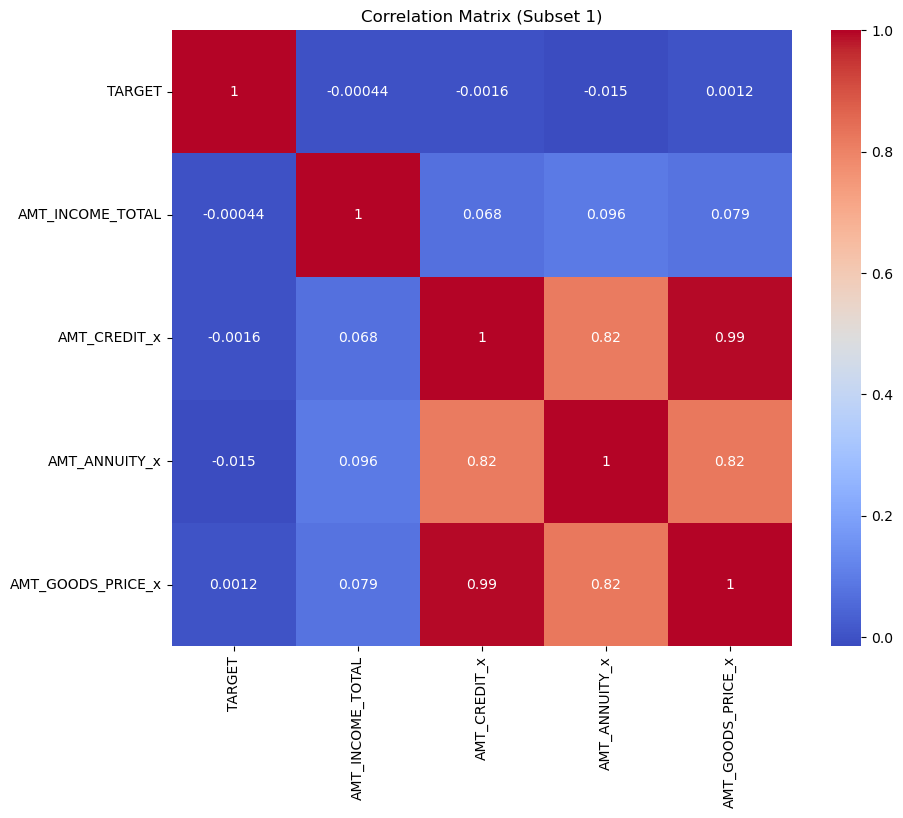

In [70]:
# Selecting first subset of columns
subset1 = new_data[['TARGET', 'AMT_INCOME_TOTAL', 'AMT_CREDIT_x', 'AMT_ANNUITY_x', 'AMT_GOODS_PRICE_x']]

# Compute correlation matrix for the first subset
corr_matrix1 = subset1.corr()

# Visualize the first correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix1, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix (Subset 1)')
plt.show()

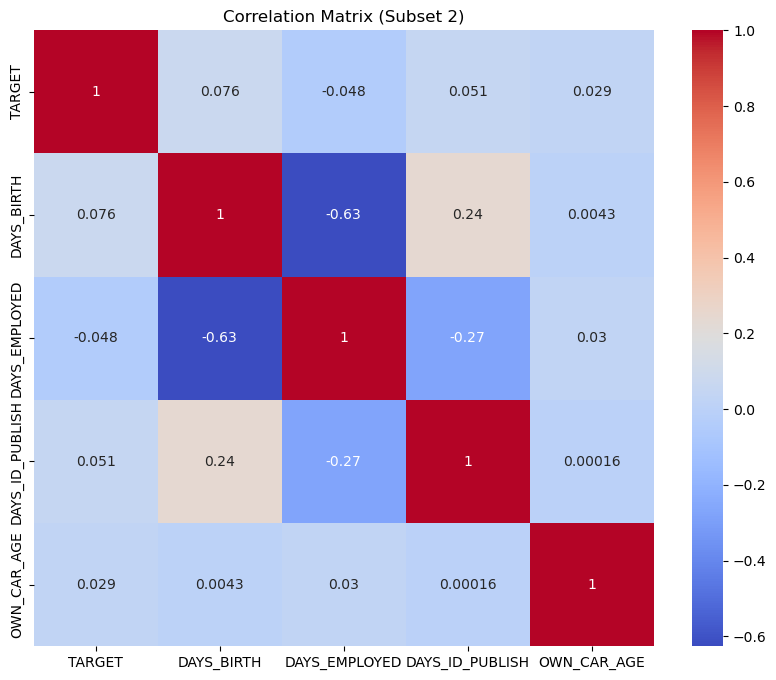

In [71]:
# Selecting second subset of columns
subset2 = new_data[['TARGET', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE']]

# Compute correlation matrix for the second subset
corr_matrix2 = subset2.corr()

# Visualize the second correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix2, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix (Subset 2)')
plt.show()

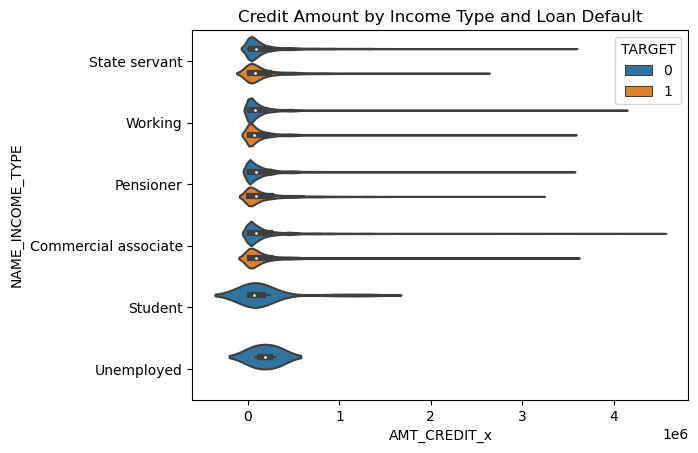

In [72]:
sns.violinplot(y='NAME_INCOME_TYPE', x='AMT_CREDIT_x', hue='TARGET', data=new_data)
plt.title('Credit Amount by Income Type and Loan Default')
plt.show()

C:\Users\TOJMARK LTD\AppData\Local\Temp\ipykernel_8532\4080706684.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sampled_data = sampled_data.append(subset.loc[sampled_indices])
C:\Users\TOJMARK LTD\AppData\Local\Temp\ipykernel_8532\4080706684.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sampled_data = sampled_data.append(subset.loc[sampled_indices])
C:\Users\TOJMARK LTD\AppData\Local\Temp\ipykernel_8532\4080706684.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sampled_data = sampled_data.append(subset.loc[sampled_indices])
C:\Users\TOJMARK LTD\AppData\Local\Temp\ipykernel_8532\4080706684.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use p

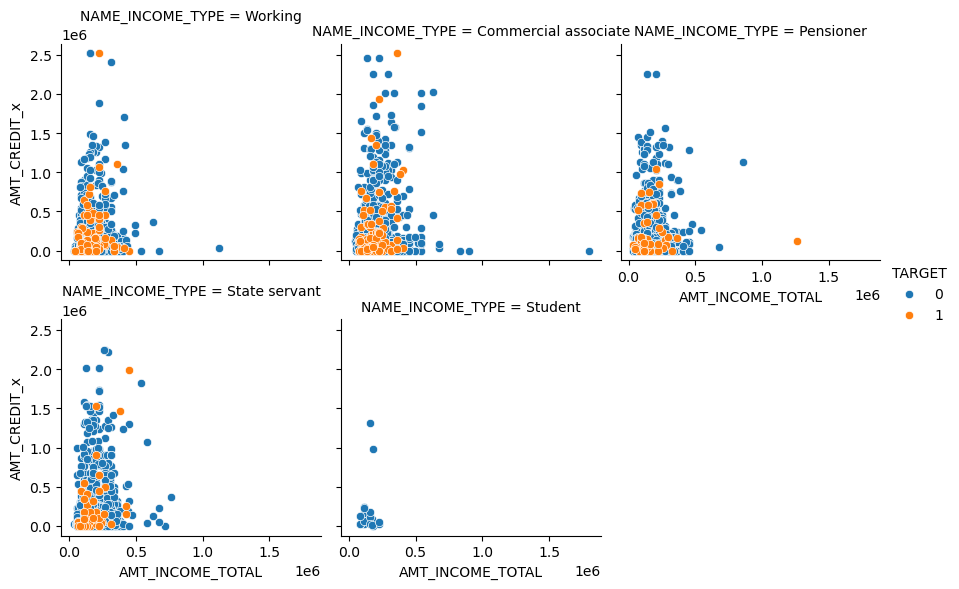

In [73]:
import random

# Select the top N income types based on value counts
top_income_types = new_data['NAME_INCOME_TYPE'].value_counts().nlargest(5).index.tolist()

# Initialize an empty DataFrame to hold the sampled data
sampled_data = pd.DataFrame()

# Sample a portion of data for each income type
for income_type in top_income_types:
    subset = new_data[new_data['NAME_INCOME_TYPE'] == income_type]
    sampled_indices = random.sample(subset.index.tolist(), min(len(subset), 1000))  # Limit to 1000 samples per income type
    sampled_data = sampled_data.append(subset.loc[sampled_indices])

# Create the FacetGrid with the sampled data
g = sns.FacetGrid(sampled_data, col='NAME_INCOME_TYPE', hue='TARGET', col_wrap=3)
g.map(sns.scatterplot, 'AMT_INCOME_TOTAL', 'AMT_CREDIT_x')
g.add_legend()
plt.show()

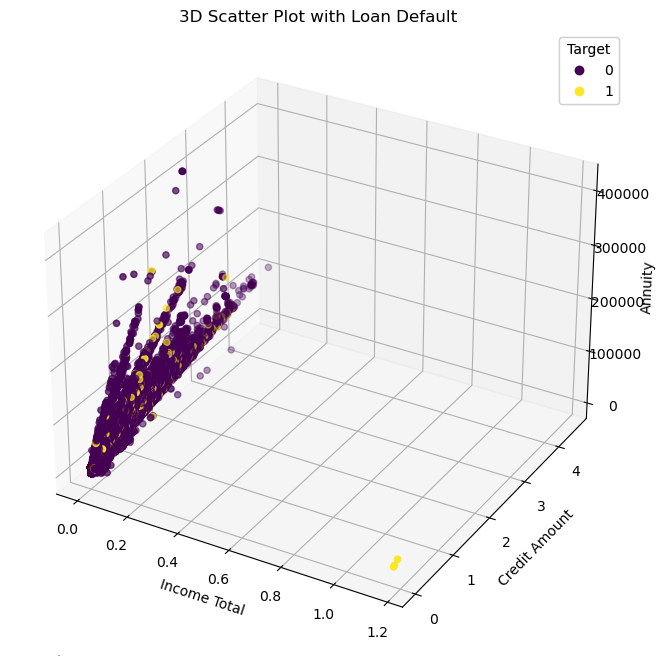

In [74]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
scatter = ax.scatter(new_data['AMT_INCOME_TOTAL'], new_data['AMT_CREDIT_x'], new_data['AMT_ANNUITY_x'], c=new_data['TARGET'])

# Axes labels
ax.set_xlabel('Income Total')
ax.set_ylabel('Credit Amount')
ax.set_zlabel('Annuity')
plt.title('3D Scatter Plot with Loan Default')

# Legend
legend1 = ax.legend(*scatter.legend_elements(), title='Target')
ax.add_artist(legend1)

plt.show()

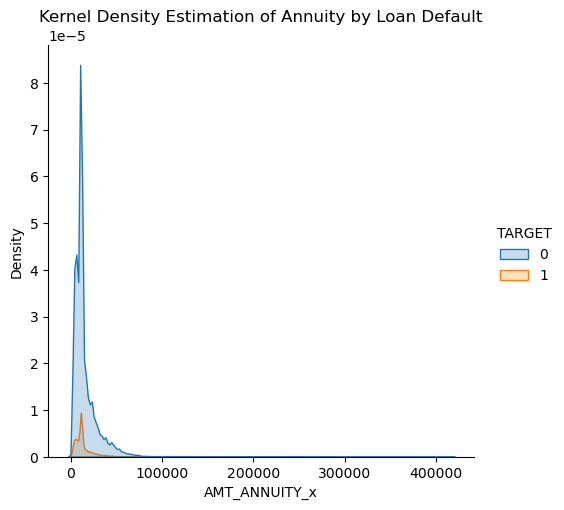

In [75]:
g = sns.displot(new_data, x='AMT_ANNUITY_x', hue='TARGET', kind='kde', fill=True)
plt.title('Kernel Density Estimation of Annuity by Loan Default')
plt.show()

# FINDINGS

Payment Status: A significant portion (8.4%) of clients experienced payment difficulties, necessitating attention to risk assessment and repayment strategies.

Household Composition: Predominantly, households consist of 1 or 2 children, indicating a potential impact of family size on financial commitments.

Gender Dynamics: Females exhibit a slightly higher tendency to miss payments compared to males, warranting further investigation into gender-specific factors influencing repayment reliability.

Age Distribution: The concentration of clients within the 30-60 age range highlights this demographic as a critical target for tailored loan policies and risk mitigation strategies.

Credit Bureau Activity: Most clients had a single credit bureau inquiry, implying limited credit activity or potentially stable financial behaviors.

Occupational Influence: Laborers, sales staff, and managers demonstrate a heightened risk of payment delinquency, emphasizing the necessity for tailored lending products or financial support.

Education's Impact: Clients with secondary school education are more prone to missed payments, hinting at the correlation between educational attainment and financial reliability.

Marital Status Dynamics: Married clients display a higher likelihood of payment difficulties, urging the exploration of marital dynamics impacting financial obligations.

Contract Preferences: Cash and consumer loans are preferred, indicating potential financial constraints among clients availing these loan types.

Income Type and Age-Family Structure Impact: Laborers, particularly within the 30-49 age range and those without children, face challenges in meeting payment deadlines, demanding targeted interventions and risk assessment methodologies.

# Recommendations:
Tailored Risk Assessment: Implement targeted risk assessment models considering demographic factors such as age, gender, family size, and education level to determine individual repayment capacities more accurately.

Client-Specific Products: Develop customized financial products and repayment schemes tailored to specific demographics and occupational categories, considering their propensity for payment delinquency.

Financial Literacy Programs: Offer financial literacy initiatives, especially to segments with higher payment defaults, to enhance their understanding of financial responsibilities and foster improved repayment habits.

Marital Dynamics Study: Conduct in-depth studies on marital dynamics impacting financial obligations to identify specific challenges faced by married individuals in meeting payment deadlines.

Credit Education Initiatives: Establish credit education programs aimed at clients with limited credit bureau activity, providing insights into responsible credit usage and building a positive credit history.

# Conclusion:
The analysis provides crucial insights into the diverse factors influencing payment defaults among loan applicants. Understanding demographic, occupational, and educational correlations with payment delinquency facilitates the creation of targeted risk mitigation strategies. By tailoring financial products, enhancing financial literacy, and conducting specialized studies, the bank can proactively mitigate payment default risks and ensure more robust lending practices aligned with diverse client segments' financial behaviors.